In [1]:
## required imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [32]:
## read data
df1 = pd.read_csv('Facebook_7_year.csv')
df2 = pd.read_csv('SZA_Chainsmoker_FB.csv')
df3 = pd.read_csv('Facebook_7_year_new_artists.csv', encoding="ISO-8859-1")
df_all_artists = pd.concat([df1,df2, df3])
artists_tobe_removed = ['carlosvivesoficial','mirandalambert','bradpaisley','TimMcGraw','chrisyoungmusic','LukeCombs','WillieNelson']
df = df_all_artists[~df_all_artists['User Name'].isin(artists_tobe_removed)]
# 311,188 total rows

In [33]:
## convert time from object to datetime
df['Created'] = df['Created'].apply(lambda x: pd.to_datetime(x))
# df.dtypes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
## round down to nearest hour
# df['Created_Hour'] = df.Created_new.dt.floor('H')

In [35]:
df_numerics = df[['Page Name','Page Likes at Posting', 'Likes','Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Thankful', 'Post Views', 'Total Views','Total Views for all Crossposts', 'Score']].reset_index(drop=True)
df_categoricals= df[['Page Name','Type','Video Share Status']].reset_index(drop=True)

In [36]:
df.head(5).T

,0,1,2,3,4
Page Name,Adam Lambert,Gerardo Ortiz,Natti Natasha,Thalia,Christina Aguilera
User Name,AdamLambert,GerardoOrtizNet,NattiNatashaOfficial,Thalia,christinaaguilera
Page Id,8.28057e+10,1.81221e+11,1.08097e+14,1.97177e+10,5.56563e+09
Page Likes at Posting,4.69738e+06,1.10389e+07,1.94752e+06,1.79403e+07,2.38994e+07
Created,2019-06-13 23:02:50,2019-06-13 22:43:06,2019-06-13 22:38:12,2019-06-13 22:18:40,2019-06-13 22:17:47
Type,Photo,Photo,Photo,Photo,Native Video
Likes,528,5534,13118,2831,2413
Comments,29,332,394,128,375
Shares,19,602,302,83,148
Love,118,6527,6897,677,1252


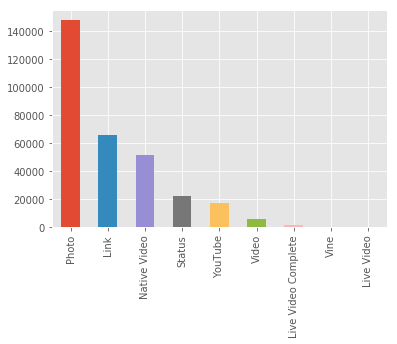

In [37]:
## understand types of posts
df['Type'].value_counts().plot(kind='bar')
plt.show()

In [38]:
# understand distribution of numerical data
df_numerics.describe()

,Page Likes at Posting,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Thankful,Post Views,Total Views,Total Views for all Crossposts
count,2.571680e+05,3.111880e+05,311188.000000,3.111880e+05,311188.000000,311188.000000,311188.000000,311188.000000,311188.000000,311188.000000,3.111880e+05,3.111880e+05,3.111880e+05
mean,1.284348e+07,1.699701e+04,367.143380,8.985195e+02,1239.301268,57.551859,99.050388,33.184381,3.894649,1.885969,1.991648e+04,6.327149e+04,1.286727e+04
std,1.600968e+07,4.736648e+04,1855.394414,9.232945e+03,5635.860741,443.739254,1216.695099,1711.520029,120.662593,67.403170,2.090080e+05,1.283889e+06,1.083231e+06
min,3.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.749877e+06,8.980000e+02,19.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.534178e+06,3.796000e+03,81.000000,1.120000e+02,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.639591e+07,1.390200e+04,260.000000,4.390000e+02,582.000000,22.000000,9.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,1.073855e+08,5.461698e+06,270424.000000,1.996798e+06,513405.000000,141444.000000,175456.000000,629624.000000,47083.000000,13370.000000,5.988562e+07,3.656423e+08,3.647394e+08


In [39]:
# get data for top 5 artists
top5_artists = ['Justin Timberlake', 'MALUMA', 'P!nk', 'Avril Lavigne', 'Willie Nelson']
df_top5 = df[df['Page Name'].isin(top5_artists)].reset_index(drop=True)
df_numerics_top5 = df_numerics[df_numerics['Page Name'].isin(top5_artists)].reset_index(drop=True)
df_categoricals_top5 = df_categoricals[df_categoricals['Page Name'].isin(top5_artists)].reset_index(drop=True)

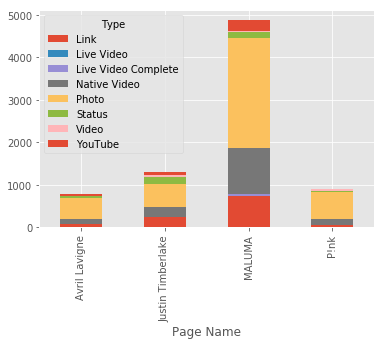

In [40]:
# type of post by top 5 artists
df_posttypes = df_top5.groupby(['Page Name', 'Type'])['Created'].count().unstack('Type').fillna(0)
df_posttypes[['Link', 'Live Video', 'Live Video Complete', 'Native Video', 'Photo', 'Status', 'Video', 'YouTube']].plot(kind='bar', stacked = True)
plt.show()

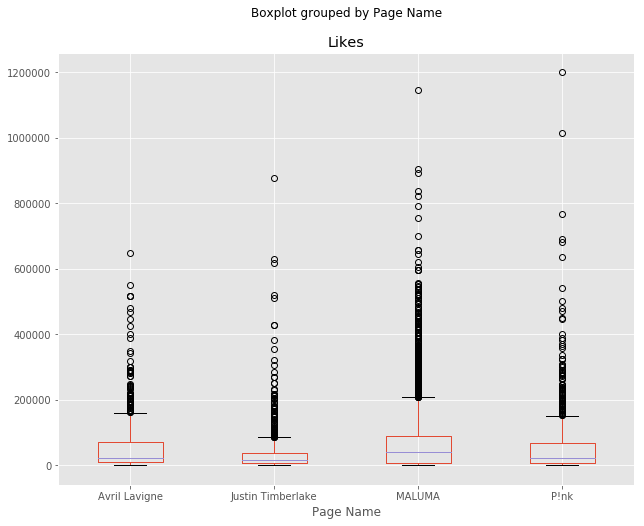

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
boxplot = df_numerics_top5.boxplot(column=['Likes'], by='Page Name', ax=ax)
# boxplot.set_ylim = (-5,400000) # ylim not working, not sure why

In [42]:
# create selected df to export and combine with other data sources
df_selected = df[["User Name", "Created", "Message", "Score", 'Page Likes at Posting', 'Likes','Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Thankful']]           

In [43]:
def update_post_types(post_type_value):
    if (str(post_type_value)=='Photo'):
        return 'photo'
    elif (str(post_type_value)=='Link'):
        return 'link'
    elif (str(post_type_value)=='Status'):
        return 'text'
    elif (str(post_type_value)=='Native Video' or str(post_type_value)=='YouTube' or str(post_type_value)=='Video' or str(post_type_value)=='Live Video Complete' or str(post_type_value)=='Vine' or str(post_type_value)=='Live Video' or str(post_type_value)=='Live Video Scheduled'):
        return 'video'
    else:
        return 'NaN'

In [44]:
# Update types to 4 only and OHE type
df1 = df.copy()
df1['Type'] = df1['Type'].astype(str)
df1['Type'] = df1['Type'].apply(lambda x : update_post_types(x))
df_type_ohe = pd.get_dummies(df1["Type"],prefix='type')
df_selected = pd.concat([df_selected, df_type_ohe], axis=1)

In [45]:
# get number of characters in each message
df_selected['Message'] = df_selected['Message'].astype(str)
df_selected['description_length'] = df_selected['Message'].apply(len)

In [46]:
def time_of_day_creation(x):
    '''
    Takes in an integer and returns one of four time slots:
    ['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    '''
    
    slots_out = ['12am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    slot0 = np.arange(0,6)
    slot1 = np.arange(6,12)
    slot2 = np.arange(12,18)
    slot3 = np.arange(18,24)

    if x in slot0:
        return slots_out[0]
    elif x in slot1:
        return slots_out[1]
    elif x in slot2:
        return slots_out[2]
    elif x in slot3:
        return slots_out[3]
    else:
        return 'NaN'

In [47]:
# Creating time of day buckets (e.g. 0-6am, 6-12pm, 12-6, 6-12am)
df_selected['time_of_day'] = df_selected['Created'].apply(lambda x : time_of_day_creation(x.hour))

In [48]:
# OHE time of day
df_time_of_day_ohe = pd.get_dummies(df_selected["time_of_day"],prefix='created')
df_selected = pd.concat([df_selected, df_time_of_day_ohe], axis=1)
df_selected = df_selected.drop(['time_of_day'], axis = 1)

In [49]:
# Time between prior and current post
df_selected.sort_values(by=['User Name','Created'], inplace=True)
df_selected['time_since_last_post'] = df_selected.groupby('User Name')['Created'].diff()

In [50]:
#Number of hashtags custom feature
df_selected['hashtag_count'] = df_selected['Message'].apply(lambda x : x.count('#'))

In [51]:
# placeholder for within 1 week of month of release
df_selected['within_week_release'] = 0
df_selected['within_month_release'] = 0

In [22]:
# posts in last 7 days (and 30) WIP

# def find_posts_count(period):
#     results = pd.Series(index=df_selected.index, name=period)
#     for index, date in df_selected.items():
#         time_range = df_selected.between_time(date - period, date )
#         results[index] = time_range.sum() - 1
#     return results.fillna(0).astype(int)

In [23]:
# posts in last 7 days (and 30) WIP

# results = pd.DataFrame(index=df_selected.index)
# period=pd.to_timedelta(1, 'd')
# for days in [7, 30]:
#     results['posts_last_%i'% days] = df_selected.groupby('User Name')[['Created']].transform(find_posts_count(pd.to_timedelta(days, 'd')))
# results.index = t['leadid']


# for index, row in df_selected.iterrows():
#     mask = (df_selected['User Name'] == row['User Name']) & (df_selected['Created'] > (row['Created'] - pd.Timedelta(days=7))) & (df_selected['Created'] < row['Created'])
#     df_selected.loc[index, 'posts_last_7days'] = sum(mask) # insert to the new column

# print(df_selected)

# df_selected.groupby('User Name')
# df_selected
# df_selected_rolling = df_selected.set_index(df_selected['Created'])
# df_selected_rolling
# df_selected_rolling.groupby('User Name')['Created'].rolling(7,freq='D').count()
# df_selected_rolling.groupby('User Name').resample('d').sum().fillna(0).\
#    groupby('User Name').rolling(14,min_periods=1).sum()

In [52]:
# calculate engagement score
df_selected['social_engagement_score'] = (df_selected['Likes'] + df_selected['Comments'] + df_selected['Shares'] + df_selected['Love'] + df_selected['Wow'] + df_selected['Haha'] + df_selected['Sad'] + df_selected['Angry']+ df_selected['Thankful'])  / df_selected['Page Likes at Posting']


In [53]:
df_selected = df_selected.drop(['Likes','Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Thankful'], axis=1)

In [26]:
## aggregate posts to artist & hour level
# df["Page Likes at Posting"] = df["Page Likes at Posting"].fillna(0)
# df_aggregate = df.groupby(["Page Name", "User Name", "Created_Hour"], as_index=False).agg({"Created": "count", "Page Likes at Posting": "max", "Likes":"mean", "Comments":"mean"})

# df_aggregate.rename({"Page Name": "FB Page Name", "Created_Hour": "FB Created_Hour", "User Name": "FB User Name", 'Created': 'FB Post Count', 'Page Likes at Posting': 'FB Page Likes at Posting', 'Likes': 'FB Likes', 'Comments': 'FB Comments'}, axis=1, inplace=True)
## 248709 rows

In [27]:
# df_aggregate_top5 = df_aggregate[df_aggregate['FB Page Name'].isin(top5_artists)].reset_index(drop=True)

In [28]:
# df_aggregate_top5.dtypes
# import datetime
# fig, ax = plt.subplots(figsize=(15,8))                      
# for x in top5_artists:
#     df_artist = df_aggregate_top5[df_aggregate_top5['FB Page Name']==x].reset_index(drop=True)
#     plot = plt.plot(df_artist['FB Created_Hour'], df_artist['FB Post Count'], label = x)
# ax.legend()
# ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2019, 1, 1)]) # can adjust time interval here
# ax.set_ylim(0,8)
# plt.show()

In [54]:
# add all other columns & rename
df_selected.rename({"User Name": "fb_handle_artist_name", "Created": "created", "Message": "description", "Score": "crowdtangle_score", "Page Likes at Posting": "count_of_followers", "Score": "crowdtangle_score"}, axis=1, inplace=True)
df_selected    

,fb_handle_artist_name,created,description,crowdtangle_score,count_of_followers,type_link,type_photo,type_text,type_video,description_length,created_12am-6am,created_12pm-6pm,created_6am-12pm,created_6pm-12am,time_since_last_post,hashtag_count,within_week_release,within_month_release,social_engagement_score
208531,21Savage,2015-05-18 15:24:23,Slaughter Tape coming 5.25.15,-354.2,NaN,0,0,1,0,29,0,1,0,0,NaT,0,0,0,NaN
207326,21Savage,2015-05-25 12:00:00,"The Slaughter Tape released May 25, 2015.",-16.5,NaN,0,1,0,0,41,0,1,0,0,6 days 20:35:37,0,0,0,NaN
207251,21Savage,2015-05-25 18:26:12,s/o The FADER for fuckin wit me http://www.the...,-62.3,NaN,1,0,0,0,107,0,0,0,1,0 days 06:26:12,0,0,0,NaN
193673,21Savage,2015-08-14 12:00:00,21 Savage with OPB & Slaughter Gang members be...,-12.26,NaN,0,1,0,0,75,0,1,0,0,80 days 17:33:48,0,0,0,NaN
189932,21Savage,2015-09-05 12:00:00,21 Savage performs during Speakerfoxxx's set a...,-24.89,NaN,0,1,0,0,100,0,1,0,0,22 days 00:00:00,0,0,0,NaN
189498,21Savage,2015-09-08 13:21:00,"For features, email: 21@21savage.com",-147.58,NaN,0,0,1,0,36,0,1,0,0,3 days 01:21:00,0,0,0,NaN
185977,21Savage,2015-09-28 13:54:17,"The Slaughter Tape released May 25, 2015.",-18.91,NaN,0,1,0,0,41,0,1,0,0,20 days 00:33:17,0,0,0,NaN
185972,21Savage,2015-09-28 14:01:11,21 Savage performs during Speakerfoxxx's set a...,-28.06,NaN,0,1,0,0,100,0,1,0,0,0 days 00:06:54,0,0,0,NaN
185970,21Savage,2015-09-28 14:06:23,21 Savage with OPB & Slaughter Gang members be...,-13.59,NaN,0,1,0,0,75,0,1,0,0,0 days 00:05:12,0,0,0,NaN
185963,21Savage,2015-09-28 14:34:24,Million Dollar Liq (ft. ManMan Savage) Video h...,-118.86,NaN,0,0,0,1,136,0,1,0,0,0 days 00:28:01,0,0,0,NaN


In [55]:
def calculateRollupPosts(social_media_df,social_media_type, social_media_handle_field):
    time_range = pd.date_range(start='1/1/2016', end='6/30/2019', freq='d').to_frame(index=False)
    time_range.rename(columns={0: 'Time Period'}, inplace=True)
    master_artists_list = pd.read_csv('master_artists_list.csv', usecols=[social_media_type])
    time_range['join_key'] = 0
    master_artists_list['join_key'] = 0
    artists_time_range = master_artists_list.merge(time_range, how='left', on = 'join_key')
    artists_time_range.drop('join_key',1, inplace=True)
    artists_time_range.rename(columns={0: 'Time Period'}, inplace=True)
    social_media_df['Created_Day'] = social_media_df.created.dt.floor('d')
    df_aggregate = social_media_df.groupby([social_media_handle_field, 'Created_Day'], as_index=False).agg({"created": "count"})
    df_aggregate.rename(columns={'created': 'Posts In Day'}, inplace=True)
    df_merged = artists_time_range.merge(df_aggregate, how='left', left_on=[social_media_type,'Time Period'], right_on=[social_media_handle_field,'Created_Day'])
    df_merged['Posts In Day'] = df_merged['Posts In Day'].fillna(0)
    df_merged['last_7_days'] = df_merged[['Posts In Day']].groupby(df_merged[social_media_type]).apply(lambda g: g.rolling(7, min_periods=1).sum())
    df_merged['last_30_days'] = df_merged[['Posts In Day']].groupby(df_merged[social_media_type]).apply(lambda g: g.rolling(30, min_periods=1).sum())
    df_merged.drop(columns=[social_media_handle_field, 'Created_Day','Posts In Day'], inplace=True)
    social_media_df = social_media_df.merge(df_merged, how='left', right_on=[social_media_type,'Time Period'], left_on=[social_media_handle_field,'Created_Day'])
    social_media_df.drop(columns=[social_media_type, 'Time Period','Created_Day'], inplace=True)
    
    return social_media_df

In [56]:
df_selected = calculateRollupPosts(df_selected,'facebook','fb_handle_artist_name')

In [57]:
df_selected[df_selected['last_7_days'].notnull()]

,fb_handle_artist_name,created,description,crowdtangle_score,count_of_followers,type_link,type_photo,type_text,type_video,description_length,...,created_12pm-6pm,created_6am-12pm,created_6pm-12am,time_since_last_post,hashtag_count,within_week_release,within_month_release,social_engagement_score,last_7_days,last_30_days
702,AdamLambert,2016-01-01 14:33:30,NYE SINGAPORE: Lewdless as usual,9.04,4919284.0,0,1,0,0,32,...,1,0,0,1 days 18:46:39,0,0,0,0.009506,1.0,1.0
703,AdamLambert,2016-01-04 13:04:48,Love this choreography! #FosseVogue w/ Noel Ba...,1.04,4920137.0,0,0,0,1,79,...,1,0,0,2 days 22:31:18,2,0,0,0.001893,2.0,2.0
704,AdamLambert,2016-01-06 11:20:55,"If you missed A&E's #BornThisWay last night, w...",1.37,4920338.0,1,0,0,0,73,...,0,1,0,1 days 22:16:07,1,0,0,0.001536,4.0,4.0
705,AdamLambert,2016-01-06 16:55:39,Thank you Topsify for including #AnotherLonely...,1.07,4920338.0,0,1,0,0,352,...,1,0,0,0 days 05:34:44,1,0,0,0.001126,4.0,4.0
706,AdamLambert,2016-01-07 16:24:59,My fans are the best! They supported charity: ...,2.47,4920461.0,1,0,0,0,94,...,1,0,0,0 days 23:29:20,0,0,0,0.002766,5.0,5.0
707,AdamLambert,2016-01-11 02:11:07,RIP,11.53,4921792.0,0,1,0,0,3,...,0,0,0,3 days 09:46:08,0,0,0,0.012114,5.0,7.0
708,AdamLambert,2016-01-11 16:30:50,The TouchTunes #BreakoutBand playlist is LIVE!...,-2.46,4921792.0,0,1,0,0,188,...,1,0,0,0 days 14:19:43,2,0,0,0.000427,5.0,7.0
709,AdamLambert,2016-01-13 11:32:40,"LETS DANCE - Osaka, Japan. Love you David Bowi...",1.93,4922619.0,0,0,0,1,202,...,0,1,0,1 days 19:01:50,1,0,0,0.003527,4.0,8.0
710,AdamLambert,2016-01-15 10:44:22,I'm going to be in The Rocky Horror Picture Show!,8.98,4923484.0,1,0,0,0,49,...,0,1,0,1 days 23:11:42,0,0,0,0.010041,4.0,9.0
711,AdamLambert,2016-01-19 09:50:00,Check out my new collaboration with Oreo!,-1.58,4923192.0,0,0,0,1,41,...,0,1,0,3 days 23:05:38,0,0,0,0.001159,4.0,11.0


In [58]:
## convert to CSV
df_selected = df_selected.reset_index(drop=True)
# df_selected = df_selected.add_prefix('FB_')
df_selected.to_csv('facebook_7yrs.csv')